# **Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto**

# Part 3 (from line 22)

In [1]:
import sys
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install lxml

     |████████████████████████████████| 122kB 19.3MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 4.8MB/s eta 0:00:01     |██████                          | 1.0MB 4.8MB/s eta 0:00:01     |█████████████████▌              | 3.0MB 4.8MB/s eta 0:00:01 5.0MB 4.8MB/s eta 0:00:01


In [2]:
import urllib.request

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [4]:
url = page = urllib.request.urlopen(url)

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"cfc64663-a75e-41b0-b38d-fe4e33f8a28b","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":969510799,"wgRevisionId":969510799,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communicati

In [8]:
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B

In [9]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

In [10]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [11]:
import pandas as pd

In [12]:
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df

,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
...,...,...,...
175,M5Z\n,Not assigned\n,Not assigned\n
176,M6Z\n,Not assigned\n,Not assigned\n
177,M7Z\n,Not assigned\n,Not assigned\n
178,M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor,..."


In [13]:
df['Neighborhood'] = df['Neighborhood'].replace('\n','', regex=True)
df['Borough'] = df['Borough'].replace('\n','', regex=True)
df['PostalCode'] = df['PostalCode'].replace('\n','', regex=True)
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [14]:
df = df.drop(df[df.Borough == "Not assigned"].index)
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [15]:
df.loc[df['Neighborhood'] == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [16]:
df_PC = pd.DataFrame(df['PostalCode'].value_counts())
df_PCunic = df_PC[df_PC['PostalCode'] > 1] 
df_PCunic

,PostalCode


In [17]:
df_clean = df.reset_index(drop=True)
df_clean

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [18]:
df_clean.shape

(103, 3)

In [19]:
!{sys.executable} -m pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 10.4MB/s ta 0:00:01
     |████████████████████████████████| 829kB 12.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [20]:
long_l = []
lat_l = []

for i in df_clean['PostalCode']:
    print(i) #This print the currently processed Postal Code to identify easily were could be potential error
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(i))
        lat_lng_coords = g.latlng
    lat_l.append(lat_lng_coords[0])
    long_l.append(lat_lng_coords[1])

M3A
M4A
M5A
M6A
M7A
M9A
M1B
M3B
M4B
M5B
M6B
M9B
M1C
M3C
M4C
M5C
M6C
M9C
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M4H
M5H
M6H
M1J
M2J
M3J
M4J
M5J
M6J
M1K
M2K
M3K
M4K
M5K
M6K
M1L
M2L
M3L
M4L
M5L
M6L
M9L
M1M
M2M
M3M
M4M
M5M
M6M
M9M
M1N
M2N
M3N
M4N
M5N
M6N
M9N
M1P
M2P
M4P
M5P
M6P
M9P
M1R
M2R
M4R
M5R
M6R
M7R
M9R
M1S
M4S
M5S
M6S
M1T
M4T
M5T
M1V
M4V
M5V
M8V
M9V
M1W
M4W
M5W
M8W
M9W
M1X
M4X
M5X
M8X
M4Y
M7Y
M8Y
M8Z


In [21]:
# Convert lat_l to dataframe
df_lat_l = pd.DataFrame(lat_l, columns=['Latitude'])
# Convert long_l to dataframe
df_long_l = pd.DataFrame(long_l, columns=['Longitude'])
# Concatenate df_clean with lat_l and long_l
toronto_data = pd.concat([df_clean, df_lat_l, df_long_l], axis=1)
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75188,-79.33036
1,M4A,North York,Victoria Village,43.73042,-79.31282
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72321,-79.45141
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65369,-79.51112
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38130
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63288,-79.48955


# Part 3 

In [22]:
import numpy as np # library to handle data in a vectorized manner

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [23]:
toronto_data.loc[4, 'Neighborhood']

"Queen's Park, Ontario Provincial Government"

In [24]:
neighborhood_latitude = toronto_data.loc[4, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[4, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[4, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Queen's Park, Ontario Provincial Government are 43.66449000000006, -79.39301999999998.


In [25]:
# @hidden_cell
CLIENT_ID = 'KBS4CBNEO0UWR2RSVTJQBD4JXVC2UCCH2ZPXMFW103FFEEJT' # your Foursquare ID
CLIENT_SECRET = 'RNGPZ3WG34QOQQS30WEMKSDPQZ5OEOXHO5KG5BYZ3FJMQVRM' # your Foursquare Secret

In [26]:
latitude = neighborhood_latitude
longitude = neighborhood_longitude
VERSION = '20180605' # Foursquare API version
search_query = neighborhood_name
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

"https://api.foursquare.com/v2/venues/explore?client_id=KBS4CBNEO0UWR2RSVTJQBD4JXVC2UCCH2ZPXMFW103FFEEJT&client_secret=RNGPZ3WG34QOQQS30WEMKSDPQZ5OEOXHO5KG5BYZ3FJMQVRM&ll=43.66449000000006,-79.39301999999998&v=20180605&query=Queen's Park, Ontario Provincial Government&radius=500&limit=100"

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f39eb3e0570a56adc12f0b2'},
 'response': {'warning': {'text': 'There aren\'t a lot of results for "Queen\'s Park, Ontario Provincial Government." Try something more general, reset your filters, or expand the search area.'},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': "queen's park ontario provincial government",
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.66899000450006,
    'lng': -79.38681094232071},
   'sw': {'lat': 43.659989995500055, 'lng': -79.39922905767925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d206bf964a520e69136e3',
       'name': "Queen's Park",
       'location': {'address': 'Unive

In [28]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Royal Ontario Museum,Museum,43.668367,-79.394813
2,Queen’s Park Veterans' Memorial,Monument / Landmark,43.661458,-79.391333


In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
radius = 500
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [33]:
print(toronto_venues.shape)
toronto_venues.head()

(2426, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75188,-79.33036,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.75188,-79.33036,PetSmart,43.748639,-79.333488,Pet Store
2,Parkwoods,43.75188,-79.33036,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.73042,-79.31282,Memories of Africa,43.726602,-79.312427,Grocery Store
4,Victoria Village,43.73042,-79.31282,The Retreat Nail & Beauty Bar,43.726134,-79.312205,Nail Salon


In [34]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,8,8,8,8,8,8
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",3,3,3,3,3,3
Bayview Village,3,3,3,3,3,3
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,4,4,4,4,4,4
Woodbine Heights,17,17,17,17,17,17


In [35]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 260 uniques categories.


In [36]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
toronto_onehot.shape

(2426, 260)

In [38]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
toronto_grouped.shape

(97, 260)

In [40]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
             venue  freq
0             Pool  0.12
1             Park  0.12
2  Badminton Court  0.12
3     Skating Rink  0.12
4    Shopping Mall  0.12


----Alderwood, Long Branch----
                venue  freq
0   Convenience Store  0.17
1  Athletics & Sports  0.17
2         Pizza Place  0.17
3      Sandwich Place  0.17
4                 Gym  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
                    venue  freq
0             IT Services  0.33
1  Furniture / Home Store  0.33
2                    Park  0.33
3             Zoo Exhibit  0.00
4                  Museum  0.00


----Bayview Village----
                        venue  freq
0  Construction & Landscaping  0.33
1                        Park  0.33
2                       Trail  0.33
3                 Zoo Exhibit  0.00
4  Modern European Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.14
1      Sandwich Place  0.09
2         C

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Pool,Badminton Court,Sushi Restaurant,Supermarket,Discount Store,Shopping Mall,Park,Elementary School,Electronics Store
1,"Alderwood, Long Branch",Gym,Pizza Place,Convenience Store,Pub,Sandwich Place,Athletics & Sports,Yoga Studio,Dumpling Restaurant,Dog Run,Donut Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,IT Services,Furniture / Home Store,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Donut Shop,Dry Cleaner,Electronics Store
3,Bayview Village,Trail,Park,Construction & Landscaping,Yoga Studio,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Thai Restaurant,Coffee Shop,Hobby Shop,Restaurant,Butcher,Indian Restaurant,Sports Club,Pub


In [43]:
# remove the column containing the names of the neighborhoods to keep only the data which will be processed by KMeans
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

inertia=[]
N=51
for k in range(2,N):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
        inertia.append(kmeans.inertia_)

inertia

[16.233033033987223,
 15.680678236306012,
 14.692255563494802,
 13.775146109005195,
 12.73321386995402,
 12.433502262709636,
 11.952509506394568,
 10.901345830486251,
 10.460721329963274,
 10.05919597395428,
 9.68419597395428,
 9.30919597395428,
 9.07035748169463,
 8.723120770825647,
 8.422910781865712,
 8.125642294511882,
 7.87072086454619,
 7.47778358782545,
 7.247423892281813,
 7.053240045567784,
 6.5718252067361975,
 6.376499947700304,
 6.079733205697967,
 5.851227586751636,
 5.741783764677855,
 5.426734126155909,
 5.101393962998286,
 5.079357243854516,
 4.860772767173094,
 4.619039843343183,
 4.409611480551416,
 4.20940536285718,
 4.0139433801587545,
 3.8893009925540634,
 3.72793288554945,
 3.60293288554945,
 3.5095827055325888,
 3.2749355695799824,
 3.1172376785722014,
 2.9777882763238237,
 2.848974908952348,
 2.684425500039918,
 2.56819912610358,
 2.4668811651029956,
 2.3050513324763457,
 2.2079166849873144,
 2.121987513873376,
 1.956536129926736,
 1.909008218299608]

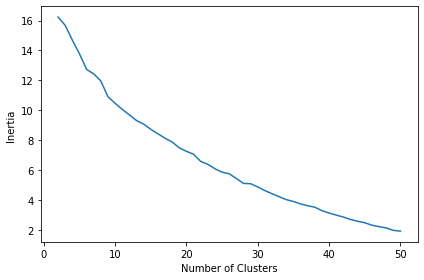

In [44]:
plt.plot(range(2,N),inertia)
plt.ylabel('Inertia ')
plt.xlabel('Number of Clusters')
plt.tight_layout()
plt.show()

In [45]:
# set number of clusters
kclusters = 2

# run k-means clustering
k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=10, random_state=0)
k_means.fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
k_means.labels_ 

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', k_means.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75188,-79.33036,0.0,Pet Store,Park,Food & Drink Shop,Falafel Restaurant,Farm,Event Space,Ethiopian Restaurant,Elementary School,Diner,Electronics Store
1,M4A,North York,Victoria Village,43.73042,-79.31282,1.0,Nail Salon,Intersection,Grocery Store,Eastern European Restaurant,Distribution Center,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265,1.0,Coffee Shop,Breakfast Spot,Theater,Event Space,Electronics Store,Spa,Food Truck,Restaurant,Italian Restaurant,Distribution Center
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72321,-79.45141,1.0,Clothing Store,Furniture / Home Store,Food Court,Sushi Restaurant,Women's Store,Toy / Game Store,Bookstore,American Restaurant,Coffee Shop,Cosmetics Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302,1.0,Coffee Shop,Sandwich Place,Park,Café,Persian Restaurant,Cocktail Bar,Salon / Barbershop,Pub,Chinese Restaurant,Burger Joint


In [47]:
toronto_merged.loc[pd.isna(toronto_merged["Cluster Labels"]), :].index

Int64Index([62, 95], dtype='int64')

In [48]:
toronto_merged.iloc[95,]

PostalCode                        M1X
Borough                   Scarborough
Neighborhood              Upper Rouge
Latitude                      43.8342
Longitude                    -79.2167
Cluster Labels                    NaN
1st Most Common Venue             NaN
2nd Most Common Venue             NaN
3rd Most Common Venue             NaN
4th Most Common Venue             NaN
5th Most Common Venue             NaN
6th Most Common Venue             NaN
7th Most Common Venue             NaN
8th Most Common Venue             NaN
9th Most Common Venue             NaN
10th Most Common Venue            NaN
Name: 95, dtype: object

In [49]:
pd.set_option('display.max_rows', None) #observe all rows
toronto_merged = toronto_merged.drop([95])
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75188,-79.33036,0.0,Pet Store,Park,Food & Drink Shop,Falafel Restaurant,Farm,Event Space,Ethiopian Restaurant,Elementary School,Diner,Electronics Store
1,M4A,North York,Victoria Village,43.73042,-79.31282,1.0,Nail Salon,Intersection,Grocery Store,Eastern European Restaurant,Distribution Center,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65514,-79.36265,1.0,Coffee Shop,Breakfast Spot,Theater,Event Space,Electronics Store,Spa,Food Truck,Restaurant,Italian Restaurant,Distribution Center
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72321,-79.45141,1.0,Clothing Store,Furniture / Home Store,Food Court,Sushi Restaurant,Women's Store,Toy / Game Store,Bookstore,American Restaurant,Coffee Shop,Cosmetics Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66449,-79.39302,1.0,Coffee Shop,Sandwich Place,Park,Café,Persian Restaurant,Cocktail Bar,Salon / Barbershop,Pub,Chinese Restaurant,Burger Joint
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.66277,-79.52831,1.0,Pharmacy,Park,Café,Shopping Mall,Bank,Skating Rink,Grocery Store,Ethiopian Restaurant,Elementary School,Discount Store
6,M1B,Scarborough,"Malvern, Rouge",43.81153,-79.19552,1.0,Zoo Exhibit,Home Service,Elementary School,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
7,M3B,North York,Don Mills,43.74929,-79.36169,1.0,Coffee Shop,Clothing Store,Gas Station,Gym,Supermarket,Park,Burger Joint,Spa,Intersection,Beer Store
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70794,-79.31160,1.0,Pizza Place,Gym / Fitness Center,Athletics & Sports,Pet Store,Pharmacy,Rock Climbing Spot,Café,Fast Food Restaurant,Breakfast Spot,Bank
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65736,-79.37818,1.0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Bookstore,Bubble Tea Shop,Movie Theater,Bar


In [50]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
pd.set_option('display.max_rows', 10) #observe maximum 10 rows
toronto_merged

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
clust1=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[list(range(6, toronto_merged.shape[1]))]]

for ven in clust1.columns:    
    temp = clust1.loc[:,ven].value_counts().head()
    print("----"+ven+"----")
    print(temp)
    print('\n')

In [ ]:
clust1_melt = clust1.melt(var_name='columns', value_name='index')
clust1_melt['index'].value_counts().head()

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

In [ ]:
clust2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[list(range(6, toronto_merged.shape[1]))]]

for ven in clust2.columns:    
    temp = clust2.loc[:,ven].value_counts().head()
    print("----"+ven+"----")
    print(temp)
    print('\n')

In [ ]:
clust2_melt = clust2.melt(var_name='columns', value_name='index')
clust2_melt['index'].value_counts().head()